In [32]:
import pandas as pd
import plotly.express as ex
from desdeo_tools.utilities import non_dominated

In [33]:
room1obj = pd.read_csv("room1/objective_vectors_2.csv", index_col=0)
room2obj = pd.read_csv("room2/objective_vectors_2.csv", index_col=0)
room3obj = pd.read_csv("room3/objective_vectors_2.csv", index_col=0)

room1obj["Group"] = "Room 1"
room2obj["Group"] = "Room 2"
room3obj["Group"] = "Room 3"

room1obj.rename(columns={"0": "Surface Area", "1":"Volume"}, inplace=True)
room2obj.rename(columns={"0": "Surface Area", "1":"Volume"}, inplace=True)
room3obj.rename(columns={"0": "Surface Area", "1":"Volume"}, inplace=True)

In [34]:
all_rooms_obj = pd.concat([room1obj, room2obj, room3obj])
all_rooms_obj["Non-dominated"] = non_dominated(all_rooms_obj[["Volume", "Surface Area"]].values)
all_rooms_obj["Volume"] = -all_rooms_obj["Volume"]

In [35]:
all_rooms_obj.describe()

,Surface Area,Volume
count,33.000000,33.000000
mean,0.173370,0.175813
std,0.337266,0.094137
min,0.000089,0.000351
25%,0.000447,0.105400
50%,0.000684,0.177759
75%,0.046997,0.238610
max,1.085697,0.384702


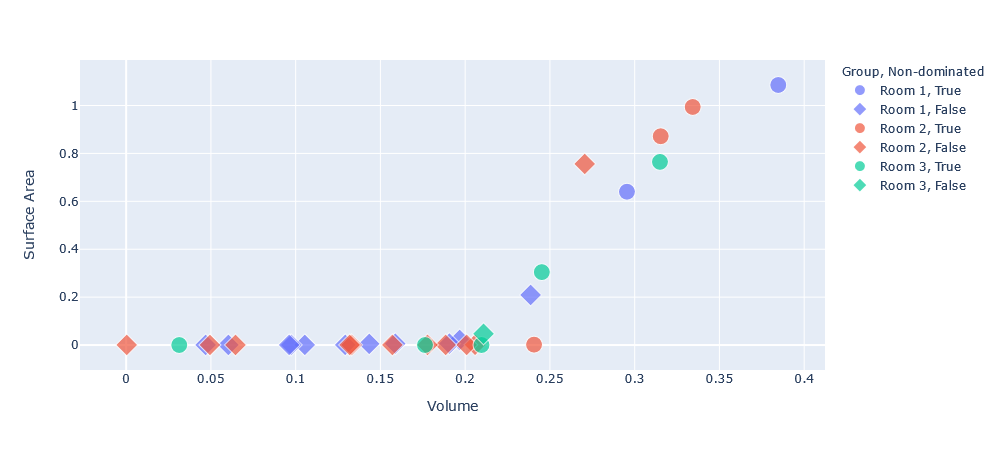

In [36]:
ex.scatter(
    all_rooms_obj,
    x="Volume",
    y="Surface Area",
    color="Group",
    symbol="Non-dominated",
    size=[1]*len(all_rooms_obj),
    size_max = 12
)